# Introduction

Welcome to our presentation on what the best neighborhood in Pittsburgh is. For our approach, we decided to focus on the general quality of living as our metric.

Our inspiration for the metric began with considering what a future-homeowner or resident might consider when deciding where to live. We felt that such an individual would consider many factors, such as access to amenities, crime statistics, and more, which all falls in line with the quality of daily life in that neighborhood. We considered alternative metrics, such as economic growth, but ultimately decided that the general quality of living would be the largest factor for the residents. 

We hope that this project will not only help us identify the best neighborhood in Pittsburgh, but also provide valuable insights into what makes a neighborhood desirable.

# The Metric

The metric of general quality of living refers to the overall well-being and livability of a neighborhood. It takes into account various factors that contribute to a high quality of life, and in our case, we focused on access to parks, traffic, and crime rates. Overall, we made our decision based on each neighborhoods ability to provide residents with a comfortable end enjoyable living experience, specifically through these submetrics.

**Parks Submetric**
1. Parks - https://data.wprdc.org/dataset/parks1

This dataset, titled Parks, was collected by the City of Pittsburgh. It provides hundreds of parks, listing various variations of their names, acreage, square footage, maintenance responsibility, and even the type of park. The features we utilize are the various park names and square footage. Notably, this dataset is missing neighborhood names. 

2. City of Pittsburgh Parks - https://data.wprdc.org/dataset/parks

The second dataset, City of Pittsburgh Parks, makes up for what the first dataset is missing by including neighborhood names. Other than that, it contains park names, types, as well as their public service divisions. The only features utilized are the park names and neighborhood names.

**Traffic Submetric**

1. Traffic Count - https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

Traffic is not enjoyable for anyone. This submetric looks at the amount of traffic over the past few years. The data provides the average count of daily car traffic in different neighborhoods. In theory, the less traffic there is in a neighborhood, the higher the quality of life will be. 

**Crime Submetric**



### Parks

Parks can substantially improve the quality of life in a neighborhood. They offer multiple benefits, such as providing recreational opportunities, enhancing the beauty of the area, and even boosting property values. The access to parks could also have a positive impact on physical and mental health by offering a place to congregate, exercise, and just enjoy the weather. They provide a safe and accessible space for the community.

For these reasons, many individuals and families might prioritize living in neighborhoods with parks, making it a good way to determine the "best" neighborhood with the "best" quality of life. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#https://data.wprdc.org/dataset/parks1/resource/bb57d0a7-e8ee-4218-8906-0dedc903038c
parks = pd.read_csv("park.csv")
#https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d?inner_span=True
parksWithArea = pd.read_csv("parksWithArea.csv")

For the metrics, we look at two seperate park-related datasets from WPRDC. The features we care about are the names of the parks, the neighborhoods the parks are located in, and the acreage of each park. 

One dataset contains neighborhood information, while the other contains acreage, so our process of cleaning ultimately combines the two.

In [9]:
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [10]:
parksWithArea.head()

,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,alterntnam,...,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
0,1202,36,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,764d9a2f-719c-49c2-b747-8f276149bf04,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Schenley,0.959034,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012
1,1203,198,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,9b969f67-1f2e-4f4b-8556-e4ac49ca208e,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Riverview,2.060117,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181
2,1204,158,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,44bbbdf5-c2db-451c-b880-9251b8211455,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Frick,0.468682,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235
3,1205,72,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,f95cbafc-dcd8-493f-8b98-89745c6434ca,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Highland,1.955430,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871
4,1206,87,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,a6a4ac92-5a00-4af5-9f11-716e51079fea,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,pgh.dcp.allisot,2023-03-21T14:04:58.979000+00:00,Parks - Highland,5.108070,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997


In [11]:
#cleaning 

parks = parks.loc[parks.type=="Park"]
parks = parks[['name','neighborhood']]

parksWithArea = parksWithArea[['origpkname','updatepknm','alterntnam','acreage']]

#merging parks with similar dataframe that includes area, left-merge to keep neighborhood names, dropna only removes 3
#so it's inconsequential

parks = pd.merge(left=parks, right=parksWithArea, how='left', left_on='name', right_on='updatepknm')
parks = parks[['name','neighborhood','acreage']]
parks = parks.dropna()

The following graph shows the top 10 neighborhoods based on their total park acreage. By identifying the neighborhoods with the most park acreage, we can see which neighborhoods stand out as having significantly more, as well as generally understand which neighborhoods should be looked at for other metrics.

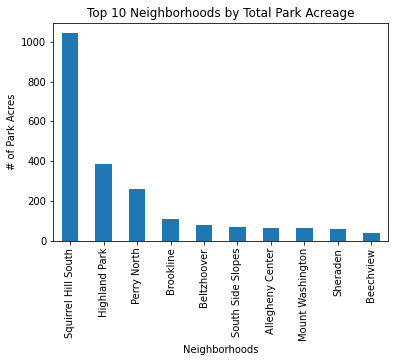

In [12]:
parks.groupby('neighborhood')['acreage'].sum().nlargest(10).plot(kind="bar",
                                                                title="Top 10 Neighborhoods by Total Park Acreage",
                                                                xlabel="Neighborhoods",
                                                                ylabel="# of Park Acres")

The following graph shows the top 10 neighborhoods based on total number of parks. Unlike the previous metric, this graph doesn't allow for the neighborhoods with very large parks to stand out. Multiple different parks can give residents more options, as well as ensure that every resident has a park near them instead of just distant large ones. 

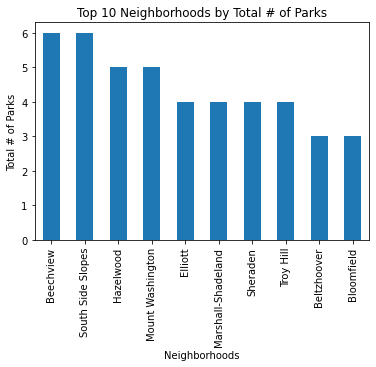

In [13]:
parks.groupby('neighborhood')['name'].count().nlargest(10).plot(kind="bar",
                                                               title="Top 10 Neighborhoods by Total # of Parks",
                                                               xlabel="Neighborhoods",
                                                               ylabel="Total # of Parks")

By looking at both of these graphs, we see that the following neighborhoods are top 10 both in park quantity and park acreage:

In acreage order:
1. Beltzhoover 6
2. South Side Slopes 4
3. Mount Washington 6
4. Sheraden 8
5. Beechview 6

In park # order:
1. Beechview
2. South Side Slopes
3. Mount Washington
4. Sheraden
5. Beltzhoover

By assigning each of these neighborhoods a number based on their order in both graphs, we can combine the numbers and determine a new order (with a lower number being ideal):

1. South Side Slopes
2. Beltzhoover
2. Mount Washington
2. Beechview
3. Sheraden

Beltzhoover, Mount Washington, and Beechview all tie for second. 

Based on this data, these 5 neighborhoods should be highly considered when looking at other metrics to determine the single neighborhood with the best quality of living.

## Crime submetric
Crime dataset - https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/044f2016-1dfd-4ab0-bc1e-065da05fca2e 

This dataset is a record of every single crime that happened in the Pittsburgh neighborhood since 2016. The data holds general information about the crime, what neighborhood, the time and date of the crime, and its latitude and longitude.


One of the biggest things to look for when searching for a neighborhood for your future home is its safety. Finding a neighborhood with low crime is generally ideal for an individual and their family's safety. Living in a home that you know is safe leaves people with a peace of mind that contributes to a better quality of life.

In [3]:
crime = pd.read_csv("044f2016-1dfd-4ab0-bc1e-065da05fca2e.csv")

crime.head()

FileNotFoundError: [Errno 2] No such file or directory: '044f2016-1dfd-4ab0-bc1e-065da05fca2e.csv'

In [4]:
# Calculating the number of crimes in each neighborhood
crimeCount = dict()
i = 0
while i < len(crime):
    neighborhood = crime.loc[i,'INCIDENTNEIGHBORHOOD']
    if neighborhood in crimeCount.keys():
        crimeCount[neighborhood] += 1
    else: 
        crimeCount[neighborhood] = 1
    i += 1

print(crimeCount)

NameError: name 'crime' is not defined

In [16]:
sort = dict(sorted(crimeCount.items(), key=lambda item: item[1]))
df = pd.DataFrame.from_dict(sort.items())
print(df)

Empty DataFrame
Columns: []
Index: []


In [17]:
df.groupby(0)[1].sum().nsmallest(5).plot(kind = "bar", ylim = (0, 20000), xlabel = "Neighborhoods", ylabel = "# of crimes", title = "Top 5 Neighborhoods with the Least Amount of Crimes")

KeyError: 0

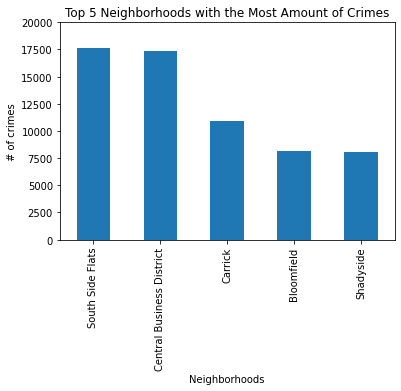

In [7]:
df.groupby(0)[1].sum().nlargest(5).plot(kind ="bar", ylim = (0, 20000), xlabel = "Neighborhoods", ylabel = "# of crimes", title = "Top 5 Neighborhoods with the Most Amount of Crimes")

As seen from the graphs, there is a large difference of number of crimes between the neighborhoods.
The 5 neighborhoods with least crime in order are:
1. Mt. Oliver Boro
2. Mt. Oliver Neighborhood
3. Outside County
4. Troy Hill-Herrs Island
5. Ridgemont

These 5 are thus the best in quality of life when considering crime.

### Traffic Submetric

Traffic Dataset: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167

By cleaning the data and finding the neighborhoods with the least amount of traffic, we can determine a quality of life ranking based on this submetric.

##### Creating DataFrame

In [3]:
import pandas as pd

#https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh
traffic = pd.read_csv("traffic.csv")

traffic.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


##### Cleaning the data

In [4]:

# deletes all rows with null values in the columns we are focusing on
traffic.dropna(subset=["average_daily_car_traffic"], inplace=True)

# Creates a dictionary of neighborhoods and car counts

# In the original data set, there are duplicate neighborhoods
# so this is done to combine the car counts from the different
# years so that there is only one instance of each neighborhood

trafficDict = dict()
i=0
while i < len(traffic):
    try:
        neighborhood = traffic.loc[i, "neighborhood"]
        if neighborhood in trafficDict.keys():
            trafficDict[neighborhood] += traffic.at[i, "average_daily_car_traffic"]
        else:
            trafficDict[neighborhood] = traffic.at[i, "average_daily_car_traffic"]
        i += 1
    except:
        i += 1
print(trafficDict)

# turns the dictionary into a pandas DataFrame
cleaned = pd.DataFrame(list(trafficDict.items()), columns =["neighborhood", "average_daily_car_traffic"] )
cleaned.head()

{'Polish Hill': 15894.0, 'Squirrel Hill South': 45484.0, 'Central Northside': 1946.0, 'Bluff': 5365.0, 'Crafton Heights': 11500.0, 'Shadyside': 18801.0, 'Highland Park': 23471.0, 'North Shore': 10350.0, 'East Liberty': 51247.0, 'Mount Washington': 43715.0, 'Brookline': 14718.0, 'Squirrel Hill North': 17649.0, 'Bloomfield': 41920.0, 'Larimer': 31987.0, 'Friendship': 4887.0, 'Point Breeze': 24125.0, 'Regent Square': 16729.0, 'Central Lawrenceville': 9145.0, 'Knoxville': 527.0, 'Central Oakland': 4158.0, 'Strip District': 29075.0, 'Greenfield': 976.0, 'Windgap': 3062.0, 'Beechview': 4255.0, 'Upper Hill': 2860.0, 'Stanton Heights': 16272.0, 'Manchester': 11344.0, 'South Side Slopes': 9114.0, 'Perry North': 8987.0, 'North Oakland': 23821.0, 'East Hills': 13788.0, 'Duquesne Heights': 5831.0, 'Sheraden': 7180.0, 'Morningside': 5508.0, 'Central Business District': 2305.0, 'St. Clair': 2436.0, 'Perry South': 6943.0, 'Elliott': 3765.0, 'Carrick': 3457.0, 'Westwood': 15400.0, 'Allegheny Center': 

,neighborhood,average_daily_car_traffic
0,Polish Hill,15894.0
1,Squirrel Hill South,45484.0
2,Central Northside,1946.0
3,Bluff,5365.0
4,Crafton Heights,11500.0


##### Sorting Data

In [5]:
# sorts by car traffic from least to greatest
cleaned.sort_values("average_daily_car_traffic", ascending=True, inplace=True)
cleaned.head(10)

,neighborhood,average_daily_car_traffic
43,Allegheny West,477.0
18,Knoxville,527.0
42,Overbrook,777.0
21,Greenfield,976.0
53,Spring Garden,1226.0
50,Beltzhoover,1577.0
41,East Allegheny,1924.0
2,Central Northside,1946.0
34,Central Business District,2305.0
40,Allegheny Center,2386.0


Ranking according to traffic count

1. Allegheny West
2. Knoxville
3. Overbrook
4. Greenfield
5. Spring Garden
6. Beltzhoover

##### Conclusion

After cleaning and sorting the data, the ranking neighborhoods with the least amount of traffic has been produced. Based on this ranking, Allegheny West has the least amount of total traffic, and would therefore have the highest quality of life by this submetric.

# The Best Neighborhood
Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.


Based on the data, we determined that Beltzhoover is the best neighborhood in Pittsburgh according to our metrics. We mainly considered the parks and traffic submetrics, where Beltzhoover ranked second and sixth, respectively. It was the only overlap from the top-scorers in both of those datasets. In crime, Beltzhoover ranked X, which, while low, still puts it in the top X% of neighborhoods. Therefore, we still believe it is still valid to call Beltzhoover the best neighborhood.

# Conclusion
Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.

Austin - I do agree that the determined best neighborhood based on our metrics is a valid conclusion, it is different than what I consider to be the best neighborhood here. While I don't have much experience with the majority of them, from my personal experience I believe that North Oakland or Shadyside are the best.

Tobias - While I am not from Pittsburgh and thus do not have a favorite neighborhood due to lack of experience with most of them, I think our data-driven result is valid. Both parks and traffic are features I'd highly consider if I was picking a neighborhood, and Beltzhoover's top scores in both of those areas is commendable. With crime, it is worth considering that a nicer neighborhood could produce more crime reports due to factors like more trust in the police force or more valuable property to protect. Additionally, a nicer neighborhood could be a more valuable target for crime. More reports of crime does not necessarily determine the quality of life of a neighborhood. In a more extensive report focused on crime, one should consider other factors such as the type of crime or severity of the crimes.